# Numerical Simulations
- for "A Non-asymptotic Moreau Envelope Theory for Generalization in Generalized Linear Models"

In [1]:
import os, time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Linear regression

In [2]:
import regression
ls_dist = ['Gaussian', 'Uniform', 'Rademacher', 'Poisson',
           'Laplace', 'StudentT', 'Weibull', 'LogNormal']

## 1. Ridge

In [3]:
num_experiment = 100
num_alphas = 100

### 1.1. Isotropic features

In [4]:
n, d = 300, 350
w_star = np.zeros((d,1))
w_star[0] = 1.5
sigma = np.sqrt(0.5)
alphas = np.linspace(-2.5, 15, num = num_alphas)

In [5]:
# well-specified
file_name = 'Isotropic_well_specified_n=' + str(n) + '_d=' + str(d) + '_Ridge.csv'

if os.path.exists(file_name):
    df = pd.read_csv(file_name).set_index('log regularization parameter')
    
else:
    df = pd.DataFrame()
    np.random.seed(0)
    
    tic = time.perf_counter()
    for dist in ls_dist:
        new_df = regression.isotropic_experiment(num_experiment, alphas, 
                                                 n, d, w_star, sigma, dist = dist, response = 'well-specified', 
                                                 method = 'ridge')
        df = pd.concat([df, new_df], axis = 0)
    toc = time.perf_counter()
    print(f'Experiment takes {toc - tic:0.4f} seconds!')

    df.to_csv(file_name)

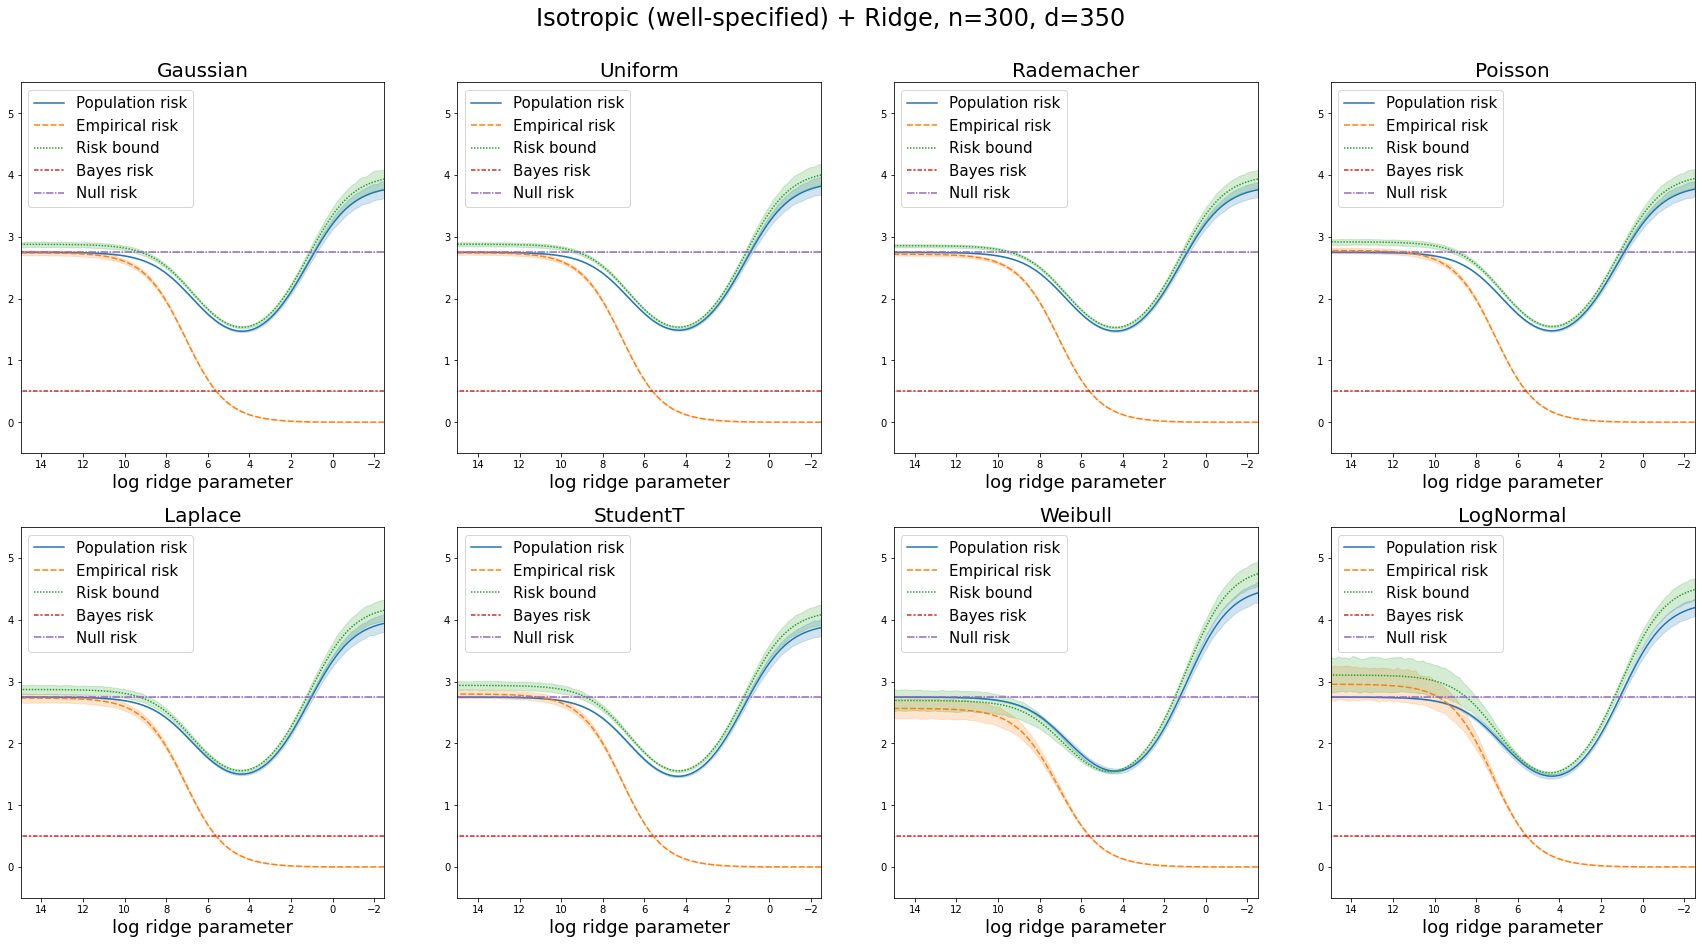

In [6]:
# make plot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))
fig.suptitle('Isotropic (well-specified) + Ridge, ' + 'n=' + str(n) + ', d=' + str(d), 
             fontsize = 24, y = 0.95)

df['Risk bound'] *= 1.05 # multiplicative factor
for i, dist in enumerate(ls_dist):
    sns.lineplot(data = df[df['Distribution'] == dist], ci = 95,
                 ax = axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(dist, fontsize = 20)
    axes[i // 4, i % 4].set_xlim((alphas[-1], alphas[0]))
    axes[i // 4, i % 4].set_xlabel('log ridge parameter', fontsize = 18)
    axes[i // 4, i % 4].set_ylim((-0.5, 5.5))
    axes[i // 4, i % 4].legend(loc = 'upper left', fontsize = 15)

plt.show()

In [7]:
# mis-specified
file_name = 'Isotropic_mis_specified_n=' + str(n) + '_d=' + str(d) + '_Ridge.csv'

if os.path.exists(file_name):
    df = pd.read_csv(file_name).set_index('log regularization parameter')
    
else:
    df = pd.DataFrame()
    np.random.seed(0)
    
    tic = time.perf_counter()
    for dist in ls_dist:
        new_df = regression.isotropic_experiment(num_experiment, alphas, 
                                                 n, d, w_star, sigma, dist = dist, response = 'mis-specified', 
                                                 method = 'ridge')
        df = pd.concat([df, new_df], axis = 0)
    toc = time.perf_counter()
    print(f'Experiment takes {toc - tic:0.4f} seconds!')

    df.to_csv(file_name)

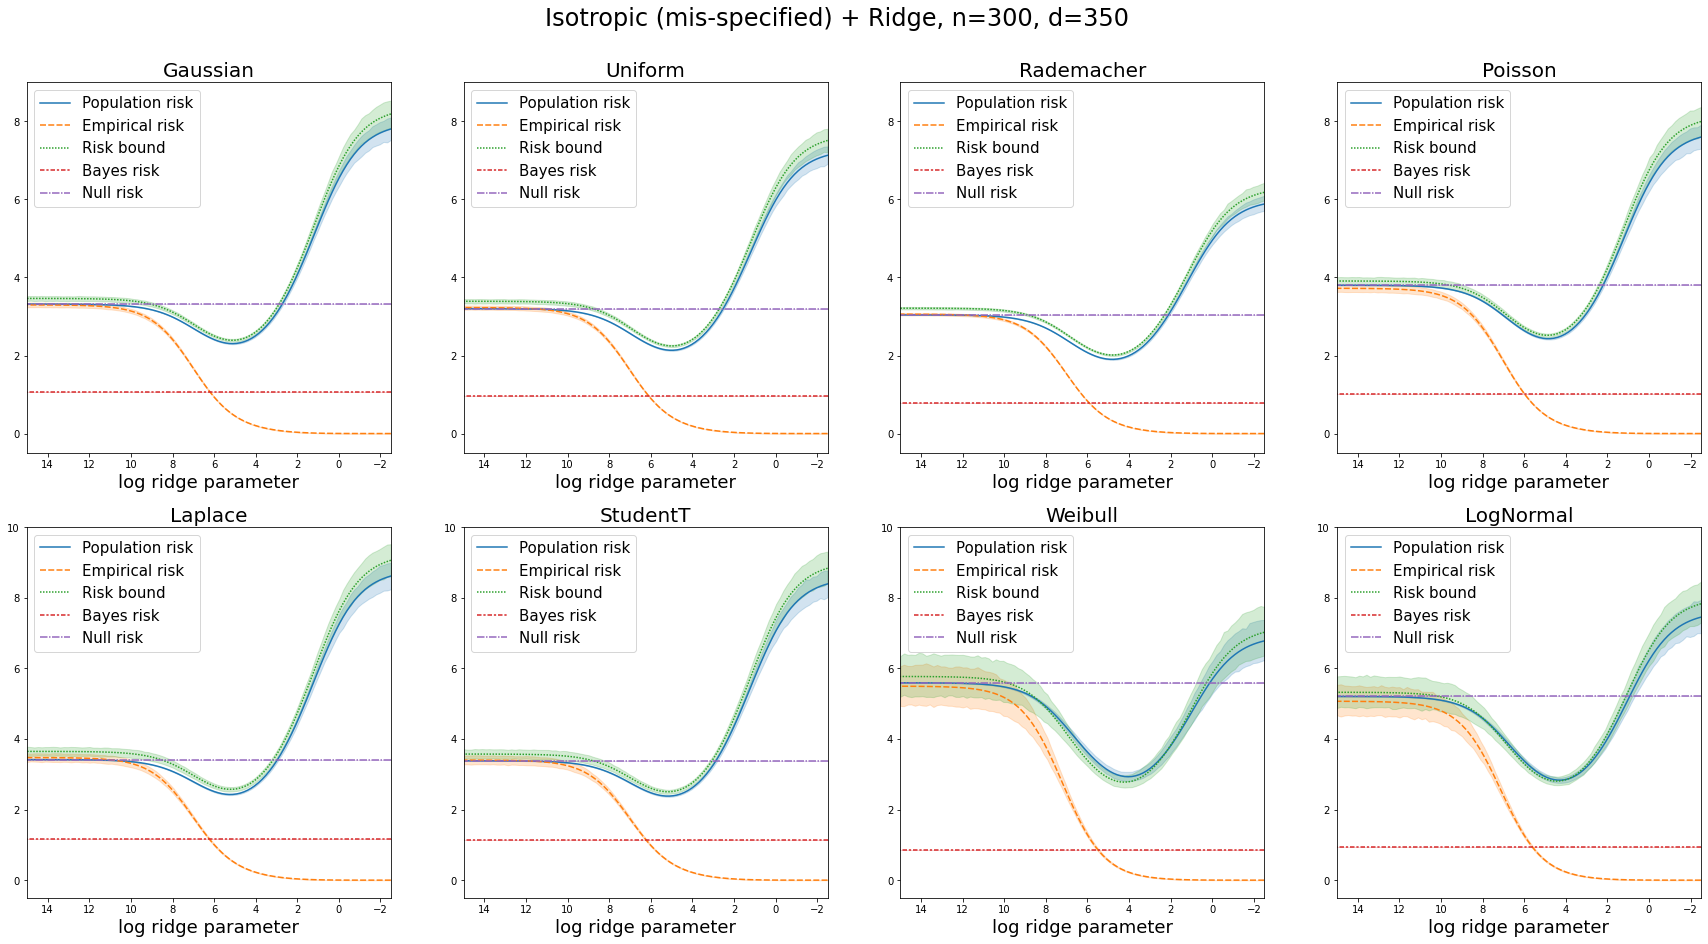

In [8]:
# make plot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))
fig.suptitle('Isotropic (mis-specified) + Ridge, ' + 'n=' + str(n) + ', d=' + str(d), 
             fontsize = 24, y = 0.95)

df['Risk bound'] *= 1.05 # multiplicative factor
for i, dist in enumerate(ls_dist):
    sns.lineplot(data = df[df['Distribution'] == dist], ci = 95,
                 ax = axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(dist, fontsize = 20)
    axes[i // 4, i % 4].set_xlim((alphas[-1], alphas[0]))
    axes[i // 4, i % 4].set_xlabel('log ridge parameter', fontsize = 18)
    if i <= 3:
        axes[i // 4, i % 4].set_ylim((-0.5, 9))
    else:
        axes[i // 4, i % 4].set_ylim((-0.5, 10))
    axes[i // 4, i % 4].legend(loc = 'upper left', fontsize = 15)

plt.show()

### 1.2. Junk features

In [9]:
n, d = 300, 3000
sqrt_cov = np.array([1] * 3 + [0.05] * (d-3))
w_star = np.zeros((d,1))
w_star[0] = 1.5
sigma = np.sqrt(0.5)
alphas = np.linspace(-2.5, 12.5, num = num_alphas)

In [10]:
# well-specified
file_name = 'Junk_feature_well_specified_n=' + str(n) + '_d=' + str(d) + '_Ridge.csv'

if os.path.exists(file_name):
    df = pd.read_csv(file_name).set_index('log regularization parameter')
    
else:
    df = pd.DataFrame()
    np.random.seed(0)
    
    tic = time.perf_counter()
    for dist in ls_dist:
        new_df = regression.experiment(num_experiment, alphas, 
                                       n, sqrt_cov, w_star, sigma, 
                                       dist = dist, response = 'well-specified',
                                       method = 'ridge', cov_split = 3)
        df = pd.concat([df, new_df], axis = 0)
    toc = time.perf_counter()
    print(f'Experiment takes {toc - tic:0.4f} seconds!')

    df.to_csv(file_name)

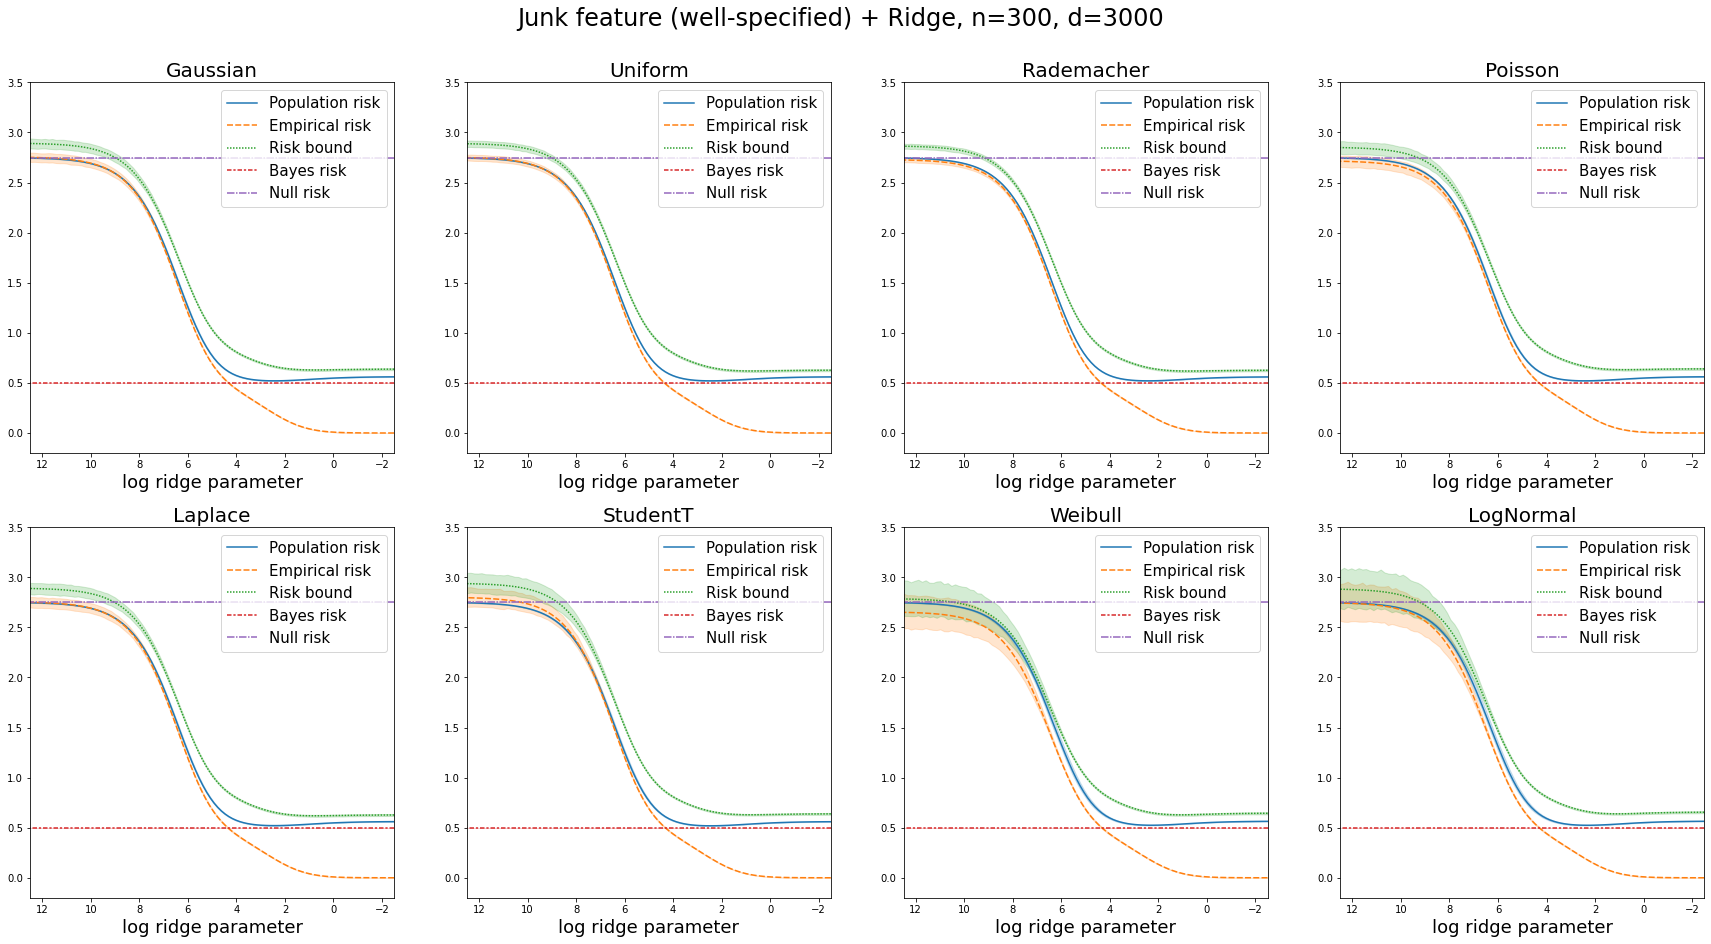

In [11]:
# make plot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))
fig.suptitle('Junk feature (well-specified) + Ridge, ' + 'n=' + str(n) + ', d=' + str(d), 
             fontsize = 24, y = 0.95)

df['Risk bound'] *= 1.05
for i, dist in enumerate(ls_dist):
    sns.lineplot(data = df[df['Distribution'] == dist], ci = 95,
                 ax = axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(dist, fontsize = 20)
    axes[i // 4, i % 4].set_xlim((alphas[-1], alphas[0]))
    axes[i // 4, i % 4].set_xlabel('log ridge parameter', fontsize = 18)
    axes[i // 4, i % 4].set_ylim((-0.2, 3.5))
    axes[i // 4, i % 4].legend(loc = 'upper right', fontsize = 15)

plt.show()

In [12]:
# mis-specified
file_name = 'Junk_feature_mis_specified_n=' + str(n) + '_d=' + str(d) + '_Ridge.csv'

if os.path.exists(file_name):
    df = pd.read_csv(file_name).set_index('log regularization parameter')
    
else:
    df = pd.DataFrame()
    np.random.seed(0)
    
    tic = time.perf_counter()
    for dist in ls_dist:
        new_df = regression.experiment(num_experiment, alphas, 
                                       n, sqrt_cov, w_star, sigma, 
                                       dist = dist, response = 'mis-specified',
                                       method = 'ridge', cov_split = 3)
        df = pd.concat([df, new_df], axis = 0)
    toc = time.perf_counter()
    print(f'Experiment takes {toc - tic:0.4f} seconds!')

    df.to_csv(file_name)

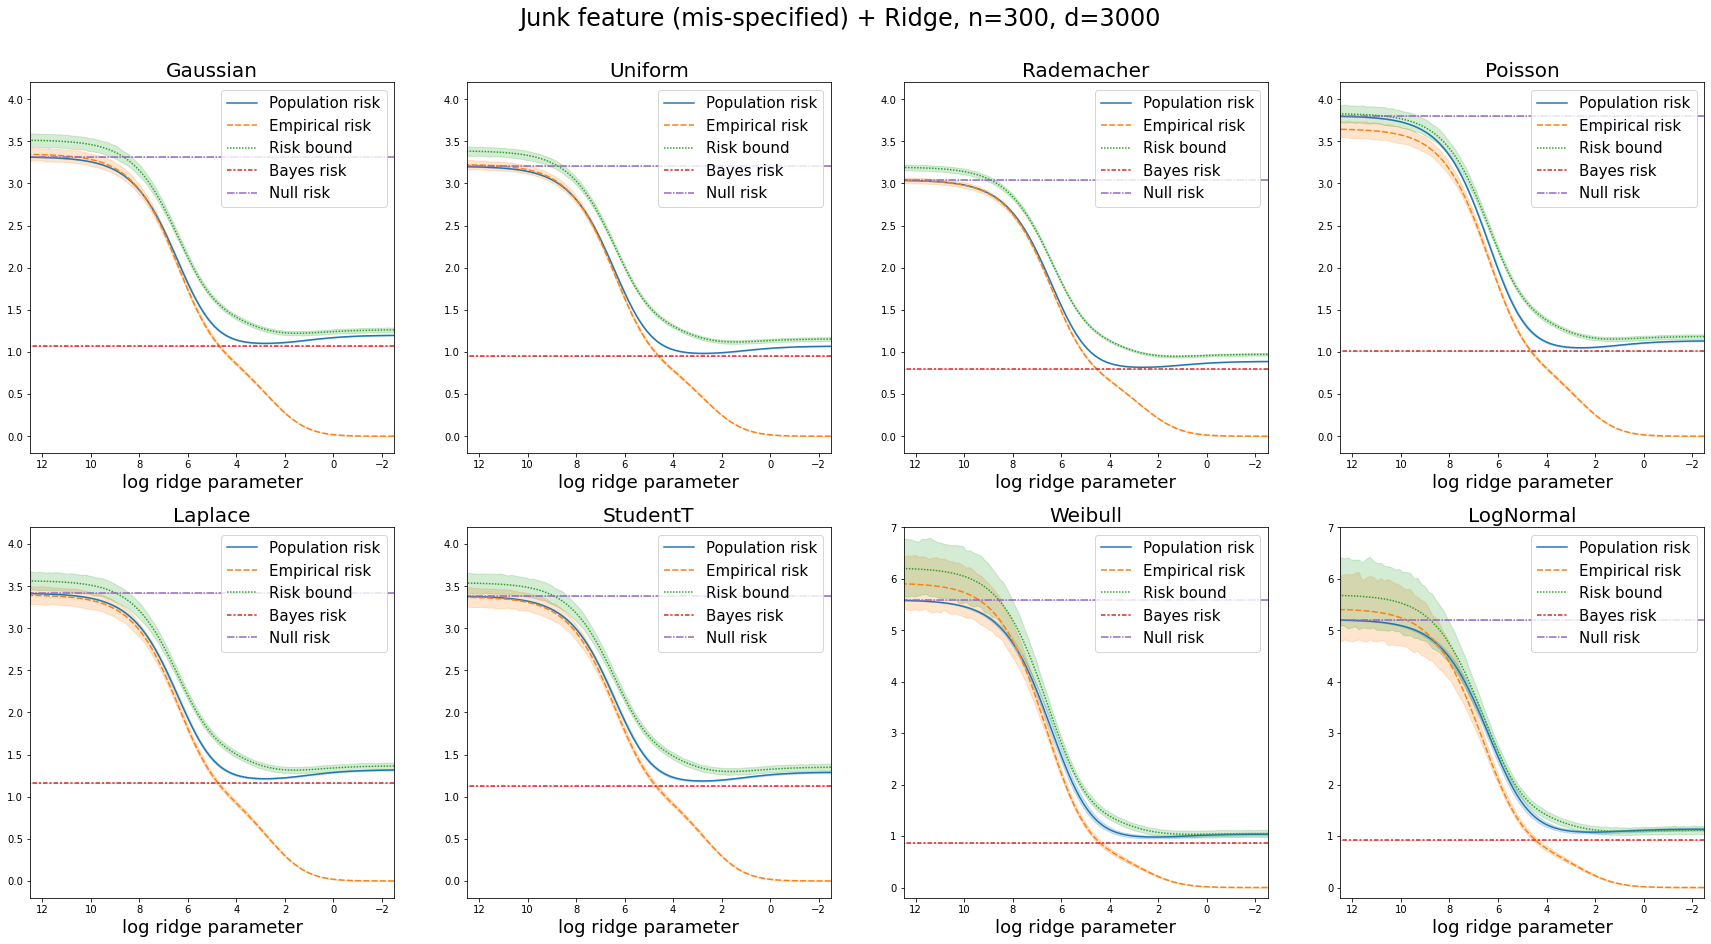

In [13]:
# make plot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))
fig.suptitle('Junk feature (mis-specified) + Ridge, ' + 'n=' + str(n) + ', d=' + str(d), 
             fontsize = 24, y = 0.95)

df['Risk bound'] *= 1.05
for i, dist in enumerate(ls_dist):
    sns.lineplot(data = df[df['Distribution'] == dist], ci = 95,
                 ax = axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(dist, fontsize = 20)
    axes[i // 4, i % 4].set_xlim((alphas[-1], alphas[0]))
    axes[i // 4, i % 4].set_xlabel('log ridge parameter', fontsize = 18)
    if i <= 5:
        axes[i // 4, i % 4].set_ylim((-0.2, 4.2))
    else:
        axes[i // 4, i % 4].set_ylim((-0.2, 7))
    axes[i // 4, i % 4].legend(loc = 'upper right', fontsize = 15)

plt.show()

### 1.3. Non-benign features

In [14]:
n, d = 300, 3000
sqrt_cov = np.array([1] * 3 + [ 1/k for k in range(4, d+1)])
w_star = np.zeros((d,1))
w_star[0] = 1.5
sigma = np.sqrt(0.5)
alphas = np.linspace(-10, 10, num = num_alphas)

In [15]:
# well-specified
file_name = 'Non_benign_well_specified_n=' + str(n) + '_d=' + str(d) + '_Ridge.csv'

if os.path.exists(file_name):
    df = pd.read_csv(file_name).set_index('log regularization parameter')
    
else:
    df = pd.DataFrame()
    np.random.seed(0)
    
    tic = time.perf_counter()
    for dist in ls_dist:
        new_df = regression.experiment(num_experiment, alphas, 
                                       n, sqrt_cov, w_star, sigma, 
                                       dist = dist, response = 'well-specified',
                                       method = 'ridge', cov_split = 3)
        df = pd.concat([df, new_df], axis = 0)
    toc = time.perf_counter()
    print(f'Experiment takes {toc - tic:0.4f} seconds!')

    df.to_csv(file_name)

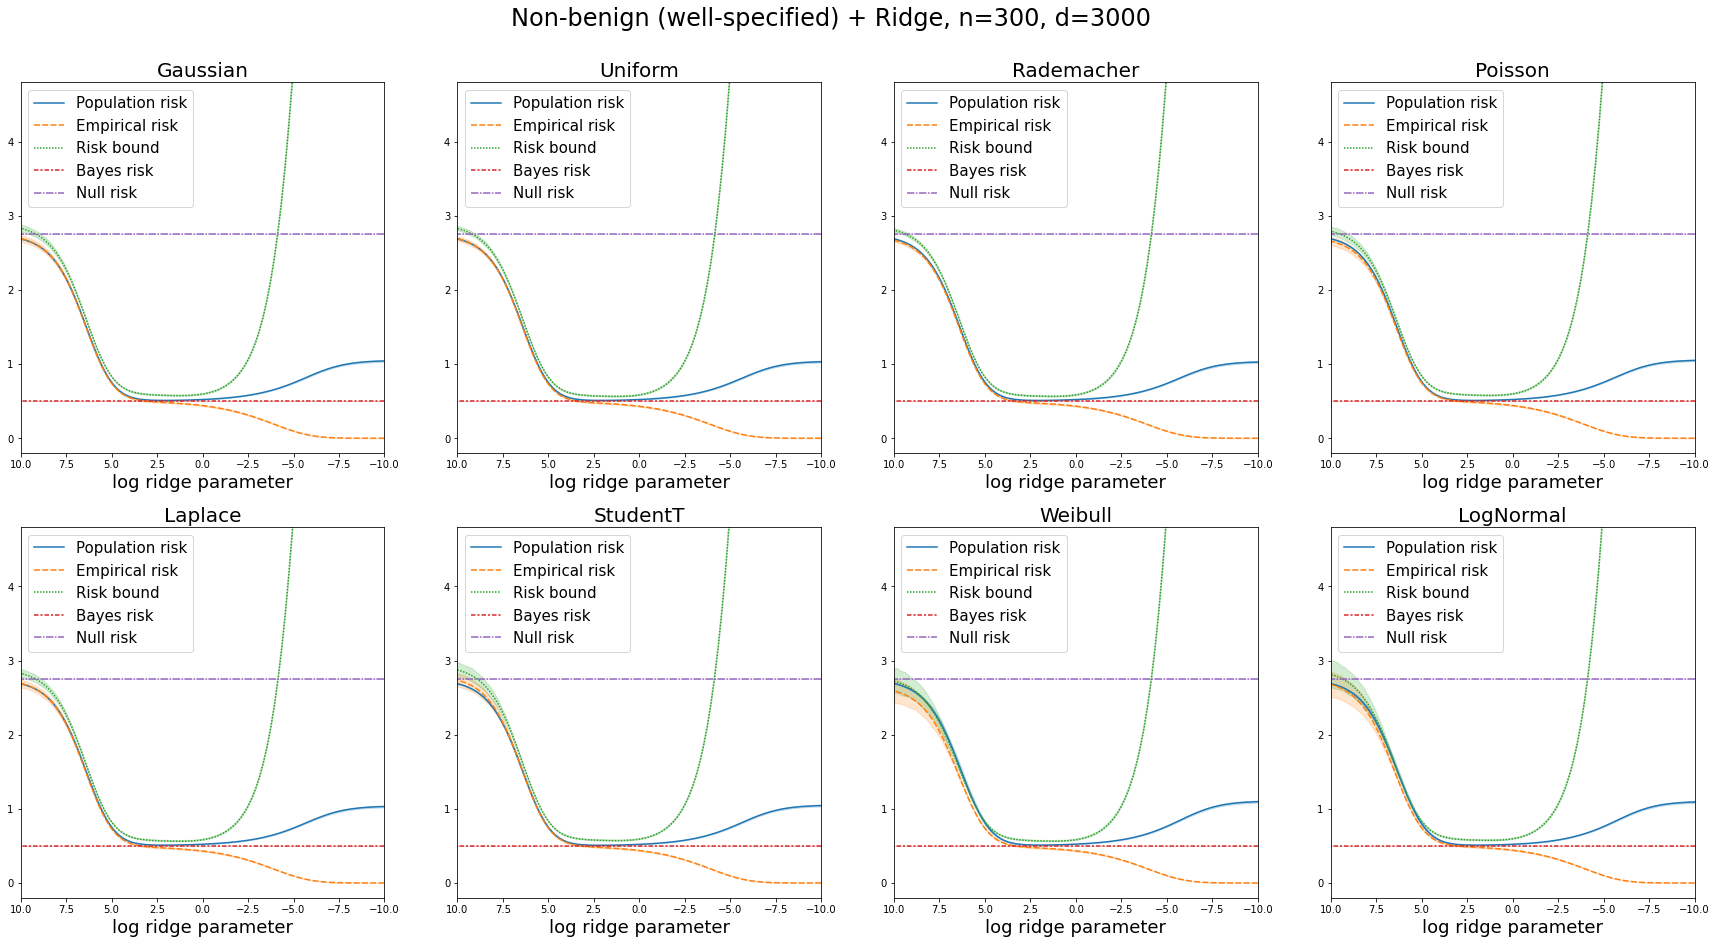

In [16]:
# make plot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))
fig.suptitle('Non-benign (well-specified) + Ridge, ' + 'n=' + str(n) + ', d=' + str(d), 
             fontsize = 24, y = 0.95)

df['Risk bound'] *= 1.05
for i, dist in enumerate(ls_dist):
    sns.lineplot(data = df[df['Distribution'] == dist], ci = 95,
                 ax = axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(dist, fontsize = 20)
    axes[i // 4, i % 4].set_xlim((alphas[-1], alphas[0]))
    axes[i // 4, i % 4].set_xlabel('log ridge parameter', fontsize = 18)
    axes[i // 4, i % 4].set_ylim((-0.2, 4.8))
    axes[i // 4, i % 4].legend(loc = 'upper left', fontsize = 15)

plt.show()

In [17]:
# mis-specified
file_name = 'Non_benign_mis_specified_n=' + str(n) + '_d=' + str(d) + '_Ridge.csv'

if os.path.exists(file_name):
    df = pd.read_csv(file_name).set_index('log regularization parameter')
    
else:
    df = pd.DataFrame()
    np.random.seed(0)
    
    tic = time.perf_counter()
    for dist in ls_dist:
        new_df = regression.experiment(num_experiment, alphas, 
                                       n, sqrt_cov, w_star, sigma, 
                                       dist = dist, response = 'mis-specified',
                                       method = 'ridge', cov_split = 3)
        df = pd.concat([df, new_df], axis = 0)
    toc = time.perf_counter()
    print(f'Experiment takes {toc - tic:0.4f} seconds!')

    df.to_csv(file_name)

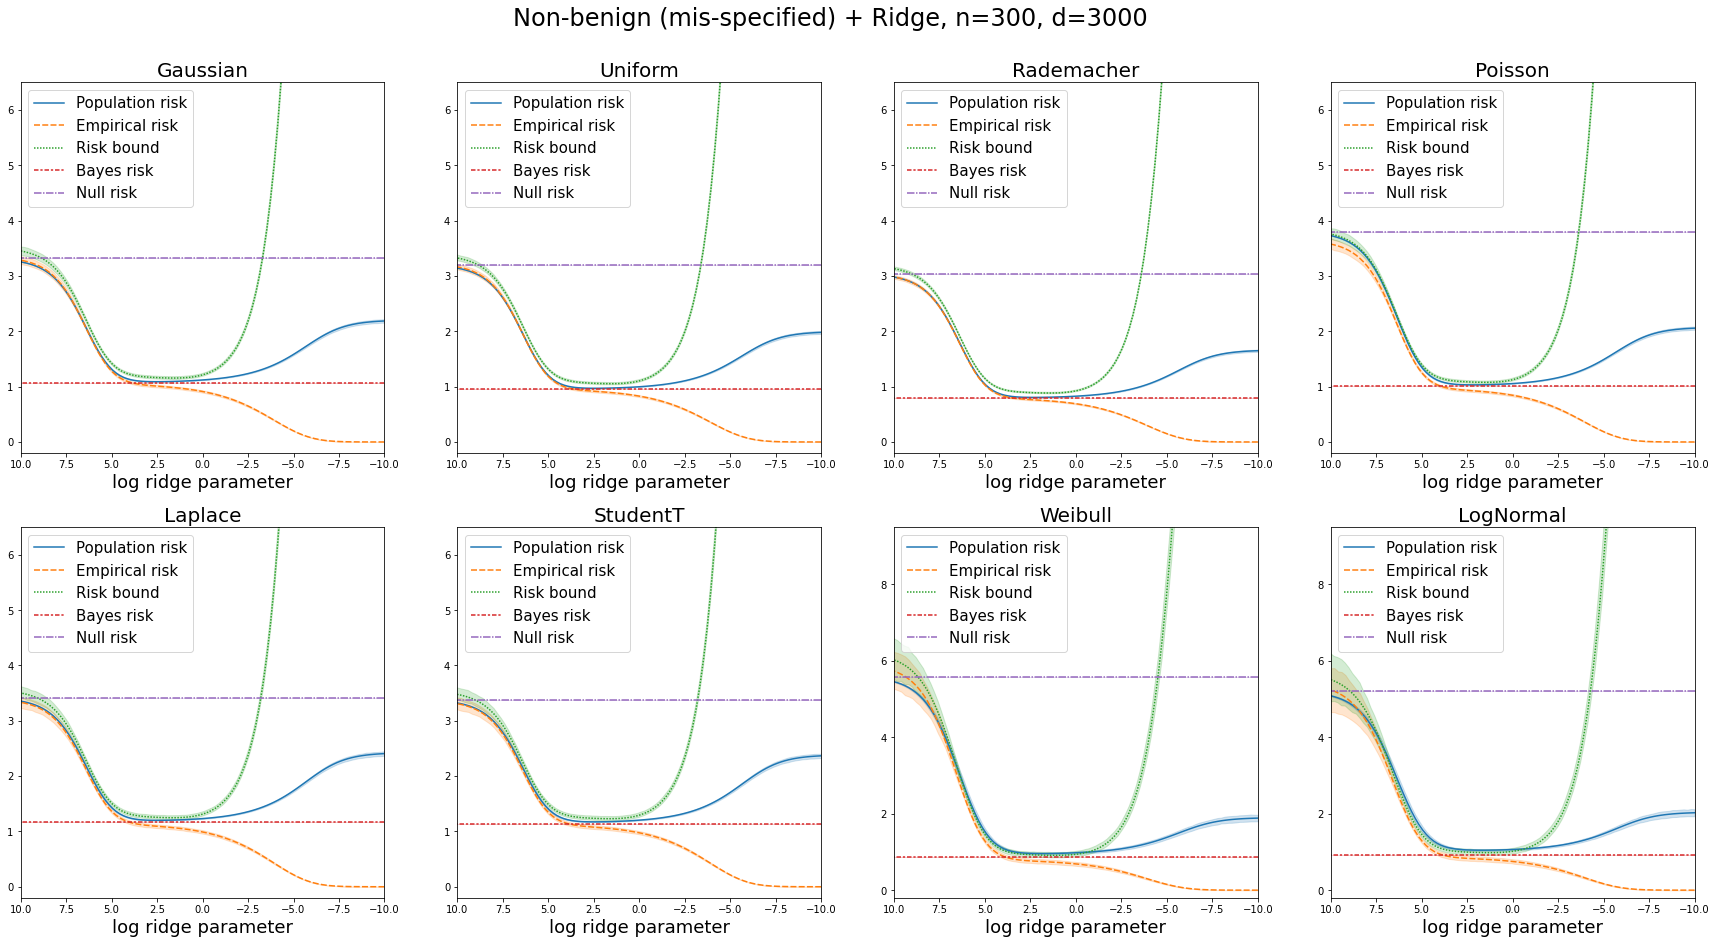

In [18]:
# make plot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))
fig.suptitle('Non-benign (mis-specified) + Ridge, ' + 'n=' + str(n) + ', d=' + str(d), 
             fontsize = 24, y = 0.95)

df['Risk bound'] *= 1.05
for i, dist in enumerate(ls_dist):
    sns.lineplot(data = df[df['Distribution'] == dist], ci = 95,
                 ax = axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(dist, fontsize = 20)
    axes[i // 4, i % 4].set_xlim((alphas[-1], alphas[0]))
    axes[i // 4, i % 4].set_xlabel('log ridge parameter', fontsize = 18)
    if i <= 5:
        axes[i // 4, i % 4].set_ylim((-0.2, 6.5))
    else:
        axes[i // 4, i % 4].set_ylim((-0.2, 9.5))
    axes[i // 4, i % 4].legend(loc = 'upper left', fontsize = 15)

plt.show()

## 2. LASSO

In [19]:
num_experiment = 100
num_alphas = 100

### 2.1. Isotropic features

In [20]:
n, d = 300, 350
w_star = np.zeros((d,1))
w_star[0] = 1.5
sigma = np.sqrt(0.5)
alphas = np.linspace(-8, 2.5, num = num_alphas)

In [21]:
# well-specified
file_name = 'Isotropic_well_specified_n=' + str(n) + '_d=' + str(d) + '_LASSO.csv'

if os.path.exists(file_name):
    df = pd.read_csv(file_name).set_index('log regularization parameter')
    
else:
    df = pd.DataFrame()
    np.random.seed(0)
    
    tic = time.perf_counter()
    for dist in ls_dist:
        new_df = regression.isotropic_experiment(num_experiment, alphas, 
                                                 n, d, w_star, sigma, dist = dist, response = 'well-specified', 
                                                 method = 'LASSO')
        df = pd.concat([df, new_df], axis = 0)
    toc = time.perf_counter()
    print(f'Experiment takes {toc - tic:0.4f} seconds!')

    df.to_csv(file_name)

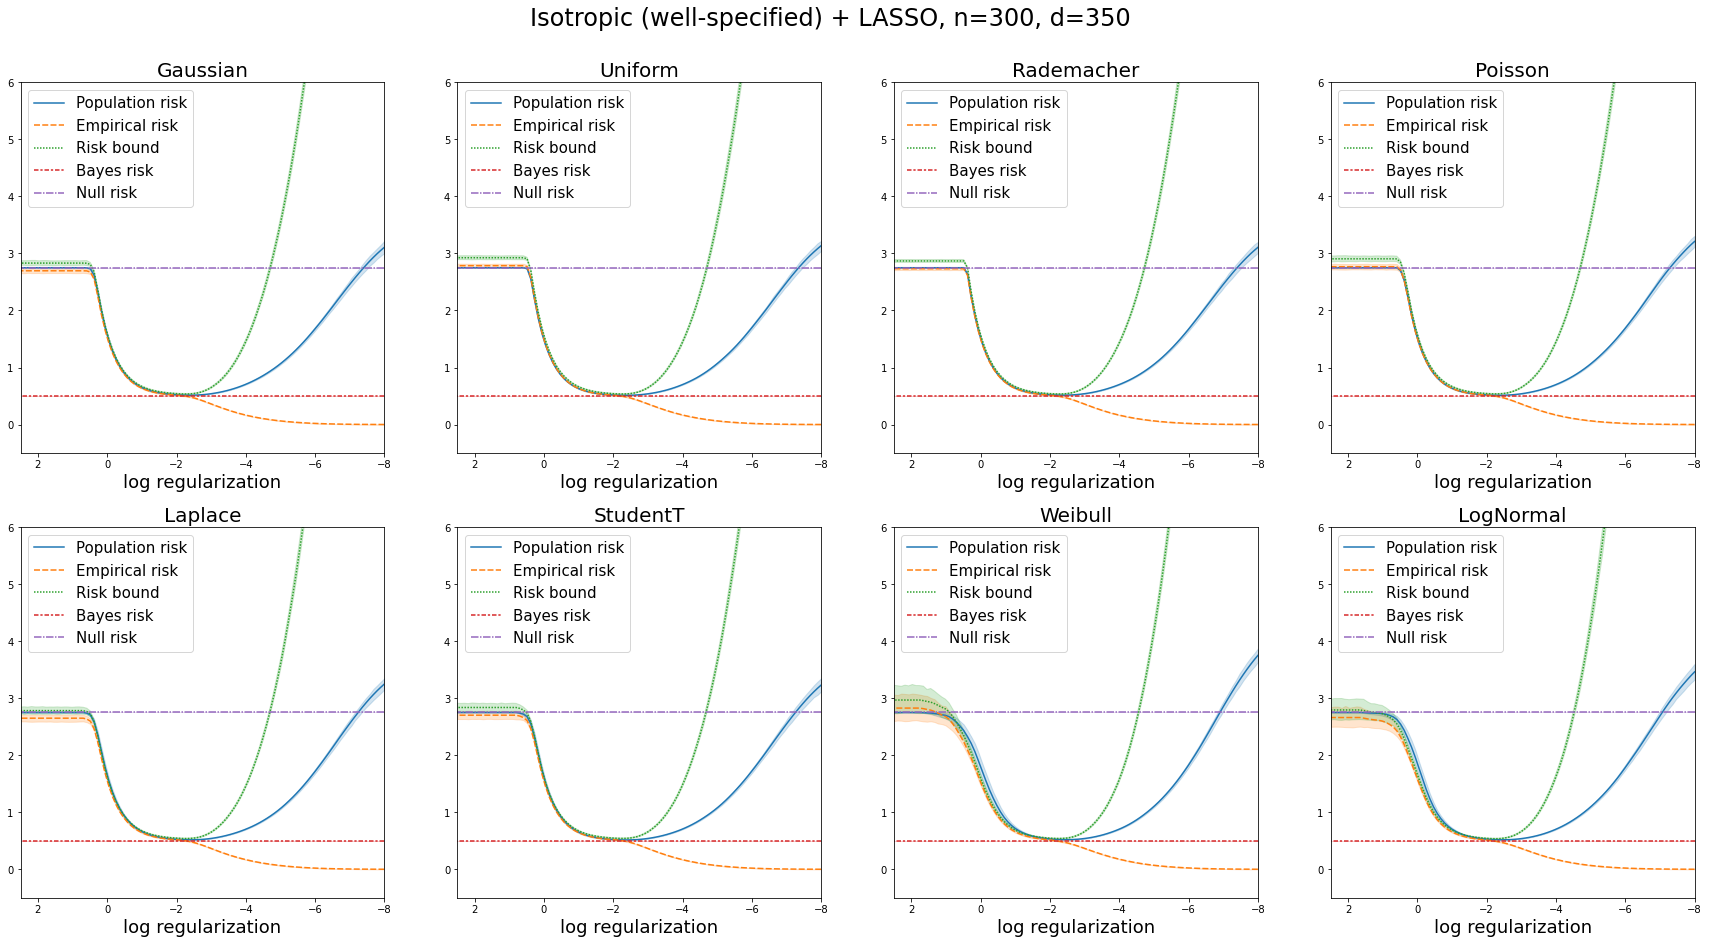

In [22]:
# make plot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))
fig.suptitle('Isotropic (well-specified) + LASSO, ' + 'n=' + str(n) + ', d=' + str(d), 
             fontsize = 24, y = 0.95)

df['Risk bound'] *= 1.05
for i, dist in enumerate(ls_dist):
    sns.lineplot(data = df[df['Distribution'] == dist], ci = 95,
                 ax = axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(dist, fontsize = 20)
    axes[i // 4, i % 4].set_xlim((alphas[-1], alphas[0]))
    axes[i // 4, i % 4].set_xlabel('log regularization', fontsize = 18)
    axes[i // 4, i % 4].set_ylim((-0.5, 6))
    axes[i // 4, i % 4].legend(loc = 'upper left', fontsize = 15)

plt.show()

In [23]:
# mis-specified
file_name = 'Isotropic_mis_specified_n=' + str(n) + '_d=' + str(d) + '_LASSO.csv'

if os.path.exists(file_name):
    df = pd.read_csv(file_name).set_index('log regularization parameter')
    
else:
    df = pd.DataFrame()
    np.random.seed(0)
    
    tic = time.perf_counter()
    for dist in ls_dist:
        new_df = regression.isotropic_experiment(num_experiment, alphas, 
                                                 n, d, w_star, sigma, dist = dist, response = 'mis-specified', 
                                                 method = 'LASSO')
        df = pd.concat([df, new_df], axis = 0)
    toc = time.perf_counter()
    print(f'Experiment takes {toc - tic:0.4f} seconds!')

    df.to_csv(file_name)

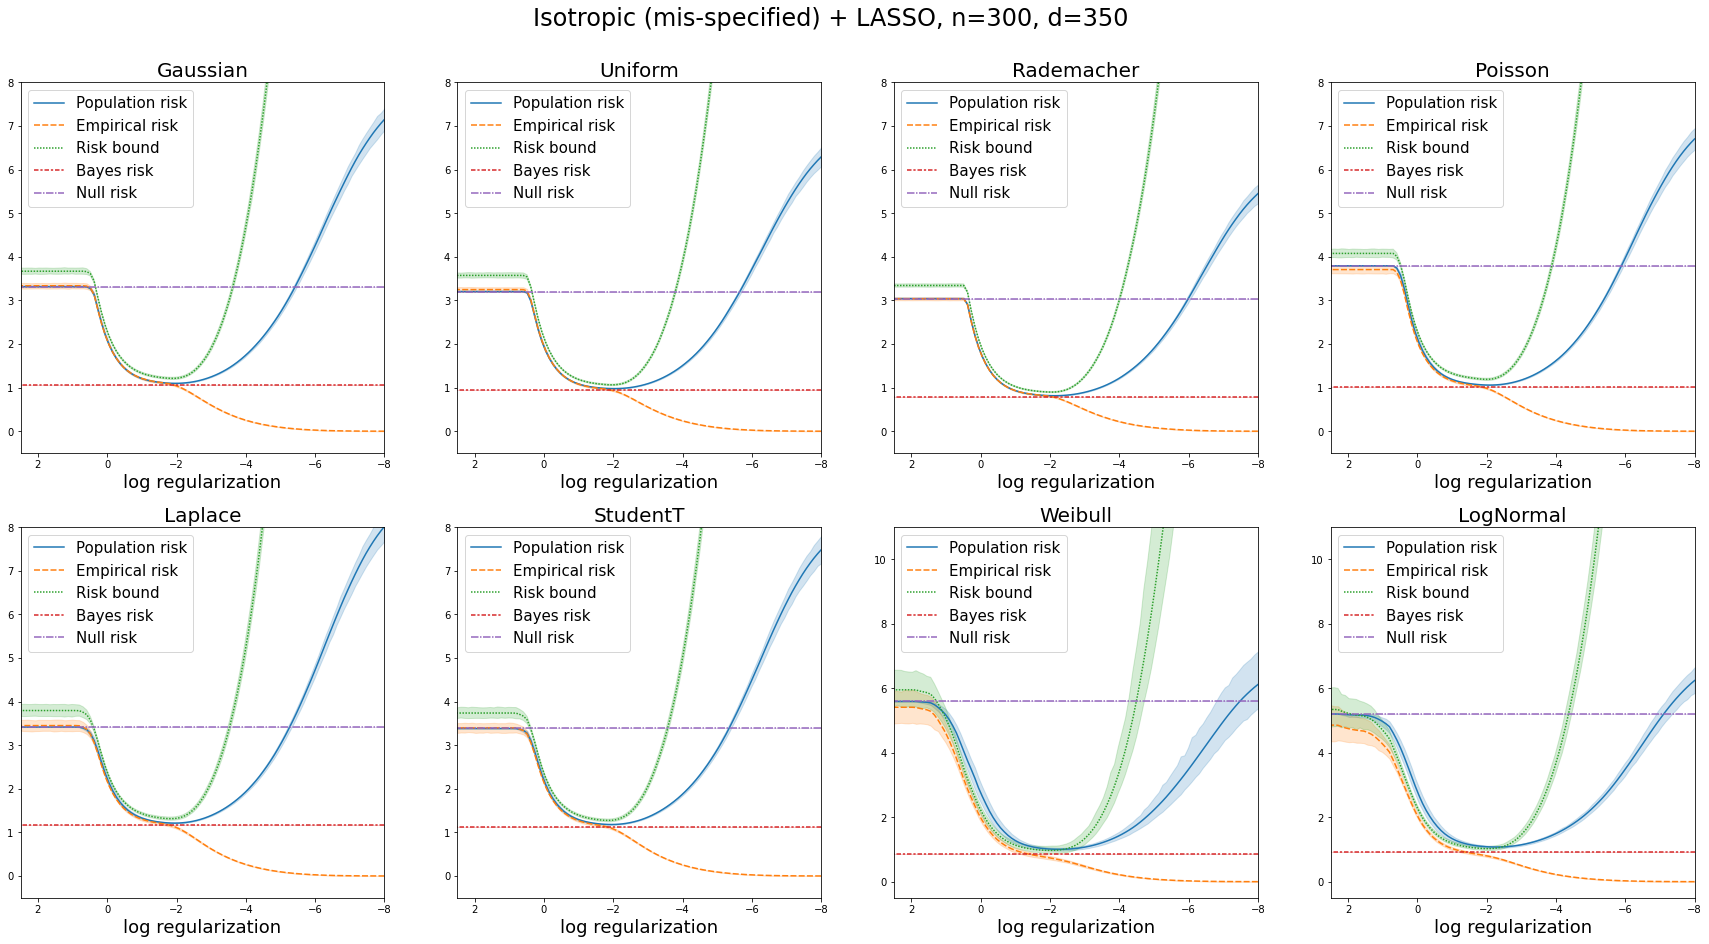

In [24]:
# make plot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))
fig.suptitle('Isotropic (mis-specified) + LASSO, ' + 'n=' + str(n) + ', d=' + str(d), 
             fontsize = 24, y = 0.95)

df['Risk bound'] *= 1.1
for i, dist in enumerate(ls_dist):
    sns.lineplot(data = df[df['Distribution'] == dist], ci = 95,
                 ax = axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(dist, fontsize = 20)
    axes[i // 4, i % 4].set_xlim((alphas[-1], alphas[0]))
    axes[i // 4, i % 4].set_xlabel('log regularization', fontsize = 18)
    if i <= 5:
        axes[i // 4, i % 4].set_ylim((-0.5, 8))
    else:
        axes[i // 4, i % 4].set_ylim((-0.5, 11))
    axes[i // 4, i % 4].legend(loc = 'upper left', fontsize = 15)

plt.show()

### 2.2. Junk features

In [25]:
n, d = 300, 3000
sqrt_cov = np.array([1] * 3 + [0.05] * (d-3))
w_star = np.zeros((d,1))
w_star[0] = 1.5
sigma = np.sqrt(0.5)
alphas = np.linspace(-10, 5, num = num_alphas)

In [26]:
# well-specified
file_name = 'Junk_feature_well_specified_n=' + str(n) + '_d=' + str(d) + '_LASSO.csv'

if os.path.exists(file_name):
    df = pd.read_csv(file_name).set_index('log regularization parameter')
    
else:
    df = pd.DataFrame()
    np.random.seed(0)
    
    tic = time.perf_counter()
    for dist in ls_dist:
        new_df = regression.experiment(num_experiment, alphas, 
                                       n, sqrt_cov, w_star, sigma, 
                                       dist = dist, response = 'well-specified',
                                       method = 'LASSO', cov_split = 3)
        df = pd.concat([df, new_df], axis = 0)
    toc = time.perf_counter()
    print(f'Experiment takes {toc - tic:0.4f} seconds!')

    df.to_csv(file_name)

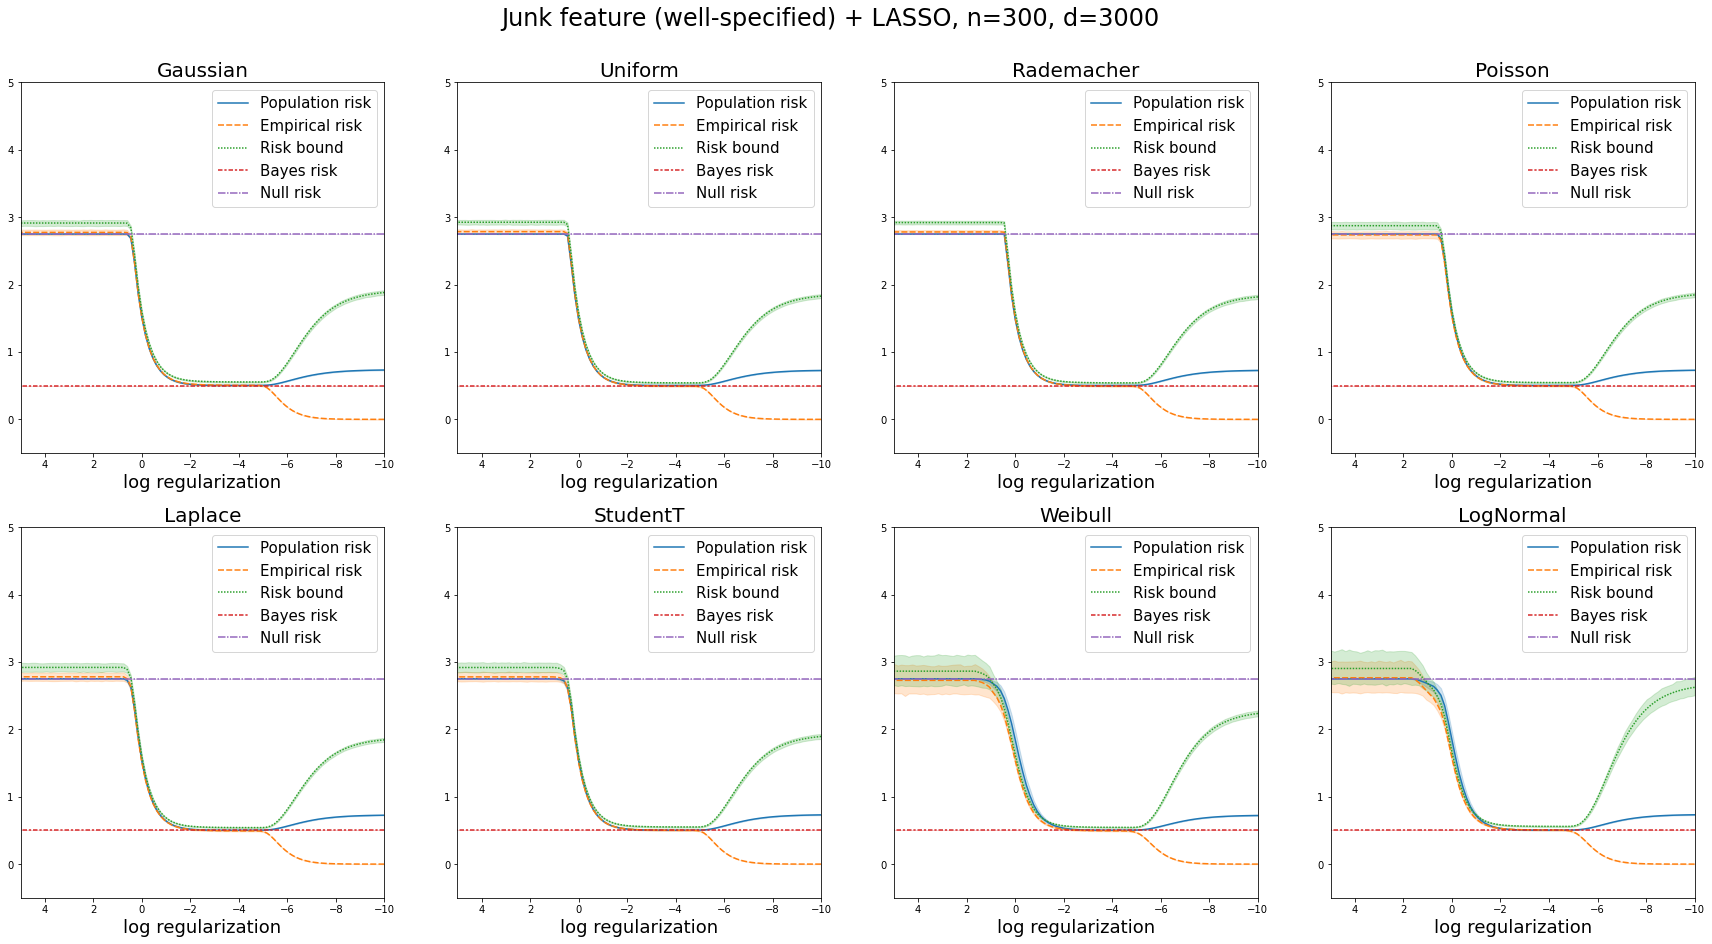

In [27]:
# make plot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))
fig.suptitle('Junk feature (well-specified) + LASSO, ' + 'n=' + str(n) + ', d=' + str(d), 
             fontsize = 24, y = 0.95)

df['Risk bound'] *= 1.05
for i, dist in enumerate(ls_dist):
    sns.lineplot(data = df[df['Distribution'] == dist], ci = 95,
                 ax = axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(dist, fontsize = 20)
    axes[i // 4, i % 4].set_xlim((alphas[-1], alphas[0]))
    axes[i // 4, i % 4].set_xlabel('log regularization', fontsize = 18)
    axes[i // 4, i % 4].set_ylim((-0.5, 5))
    axes[i // 4, i % 4].legend(loc = 'upper right', fontsize = 15)

plt.show()

In [28]:
# mis-specified
file_name = 'Junk_feature_mis_specified_n=' + str(n) + '_d=' + str(d) + '_LASSO.csv'

if os.path.exists(file_name):
    df = pd.read_csv(file_name).set_index('log regularization parameter')
    
else:
    df = pd.DataFrame()
    np.random.seed(0)
    
    tic = time.perf_counter()
    for dist in ls_dist:
        new_df = regression.experiment(num_experiment, alphas, 
                                       n, sqrt_cov, w_star, sigma, 
                                       dist = dist, response = 'mis-specified',
                                       method = 'LASSO', cov_split = 3)
        df = pd.concat([df, new_df], axis = 0)
    toc = time.perf_counter()
    print(f'Experiment takes {toc - tic:0.4f} seconds!')

    df.to_csv(file_name)

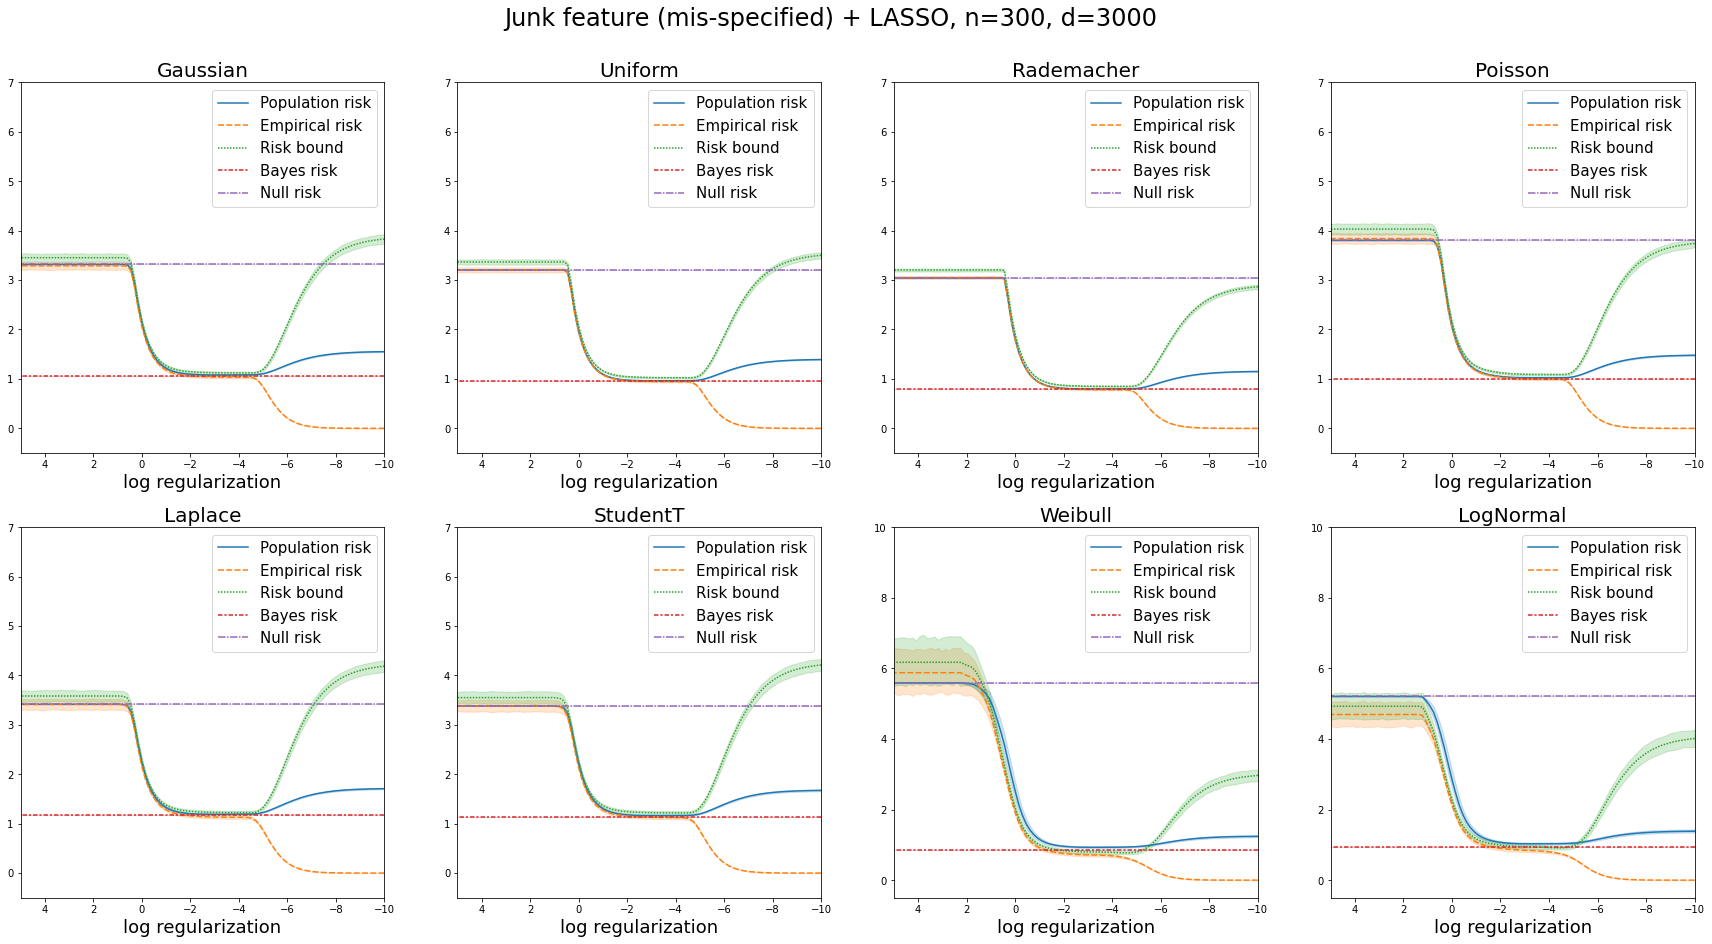

In [29]:
# make plot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))
fig.suptitle('Junk feature (mis-specified) + LASSO, ' + 'n=' + str(n) + ', d=' + str(d), 
             fontsize = 24, y = 0.95)

df['Risk bound'] *= 1.05
for i, dist in enumerate(ls_dist):
    sns.lineplot(data = df[df['Distribution'] == dist], ci = 95,
                 ax = axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(dist, fontsize = 20)
    axes[i // 4, i % 4].set_xlim((alphas[-1], alphas[0]))
    axes[i // 4, i % 4].set_xlabel('log regularization', fontsize = 18)
    if i <= 5:
        axes[i // 4, i % 4].set_ylim((-0.5, 7))
    else:
        axes[i // 4, i % 4].set_ylim((-0.5, 10))
    axes[i // 4, i % 4].legend(loc = 'upper right', fontsize = 15)

plt.show()

### 2.3. Non-benign features

In [30]:
n, d = 300, 3000
sqrt_cov = np.array([1] * 3 + [ 1/k for k in range(4, d+1)])
w_star = np.zeros((d,1))
w_star[0] = 1.5
sigma = np.sqrt(0.5)
alphas = np.linspace(-15, 5, num = num_alphas)

In [31]:
# well-specified
file_name = 'Non_benign_well_specified_n=' + str(n) + '_d=' + str(d) + '_LASSO.csv'

if os.path.exists(file_name):
    df = pd.read_csv(file_name).set_index('log regularization parameter')
    
else:
    df = pd.DataFrame()
    np.random.seed(0)
    
    tic = time.perf_counter()
    for dist in ls_dist:
        new_df = regression.experiment(num_experiment, alphas, 
                                       n, sqrt_cov, w_star, sigma, 
                                       dist = dist, response = 'well-specified',
                                       method = 'LASSO', cov_split = 3)
        df = pd.concat([df, new_df], axis = 0)
    toc = time.perf_counter()
    print(f'Experiment takes {toc - tic:0.4f} seconds!')

    df.to_csv(file_name)

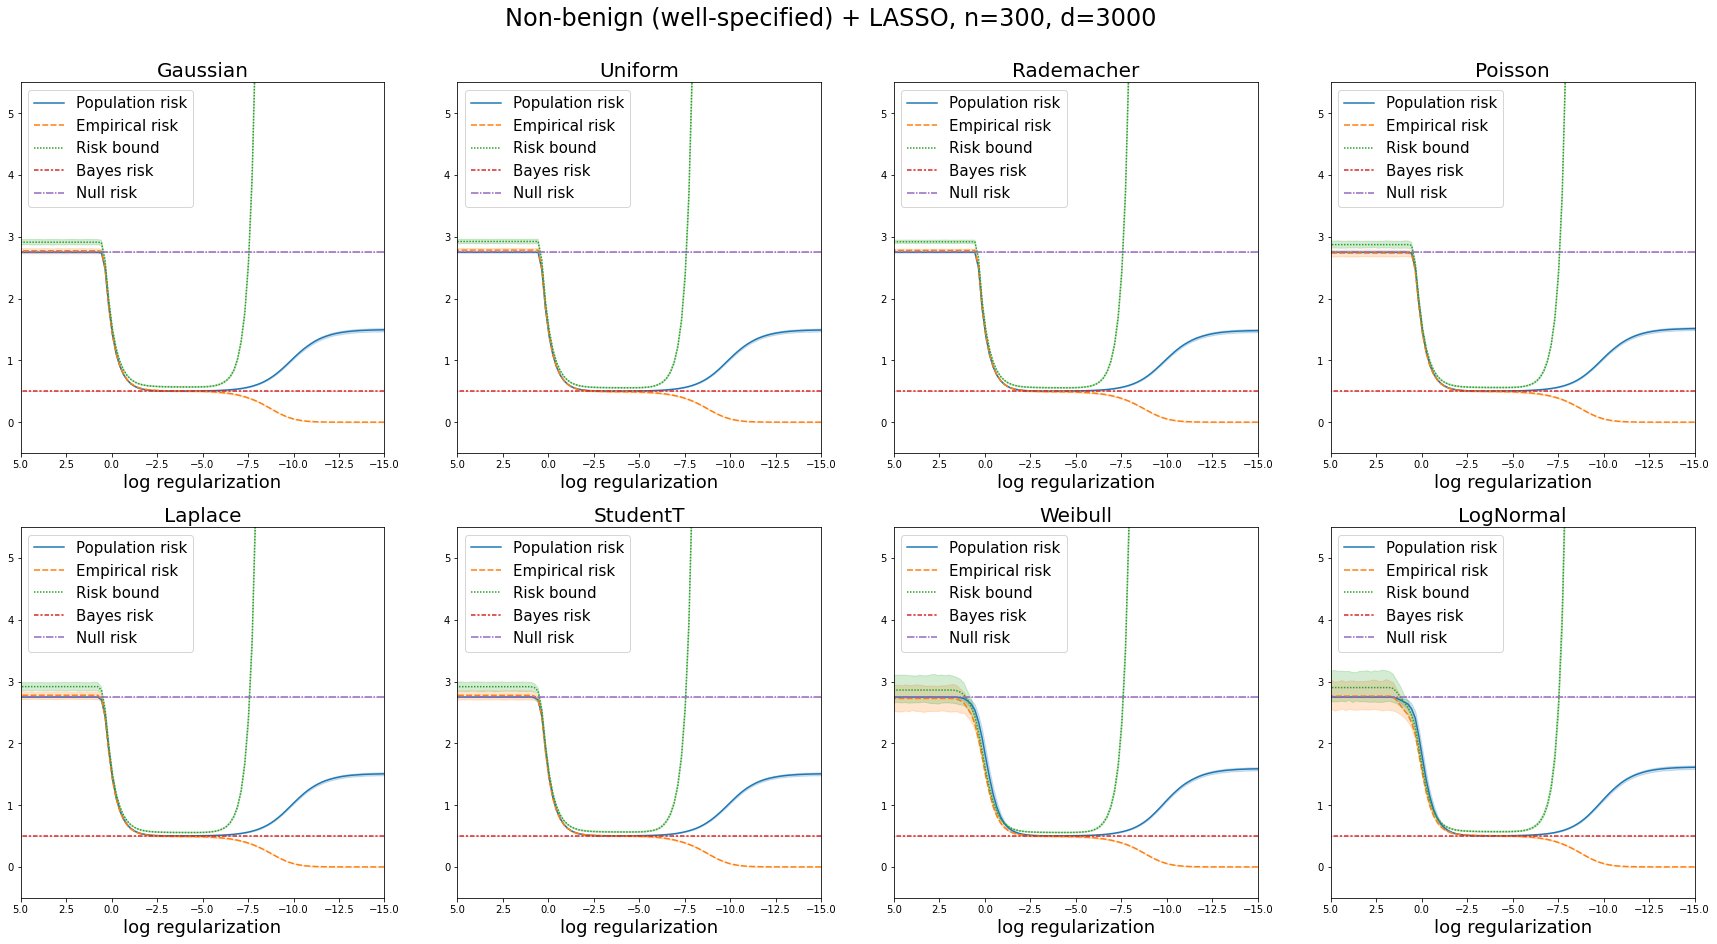

In [32]:
# make plot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))
fig.suptitle('Non-benign (well-specified) + LASSO, ' + 'n=' + str(n) + ', d=' + str(d), 
             fontsize = 24, y = 0.95)

df['Risk bound'] *= 1.05
for i, dist in enumerate(ls_dist):
    sns.lineplot(data = df[df['Distribution'] == dist], ci = 95,
                 ax = axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(dist, fontsize = 20)
    axes[i // 4, i % 4].set_xlim((alphas[-1], alphas[0]))
    axes[i // 4, i % 4].set_xlabel('log regularization', fontsize = 18)
    axes[i // 4, i % 4].set_ylim((-0.5, 5.5))
    axes[i // 4, i % 4].legend(loc = 'upper left', fontsize = 15)

plt.show()

In [33]:
# mis-specified
file_name = 'Non_benign_mis_specified_n=' + str(n) + '_d=' + str(d) + '_LASSO.csv'

if os.path.exists(file_name):
    df = pd.read_csv(file_name).set_index('log regularization parameter')
    
else:
    df = pd.DataFrame()
    np.random.seed(0)
    
    tic = time.perf_counter()
    for dist in ls_dist:
        new_df = regression.experiment(num_experiment, alphas, 
                                       n, sqrt_cov, w_star, sigma, 
                                       dist = dist, response = 'mis-specified',
                                       method = 'LASSO', cov_split = 3)
        df = pd.concat([df, new_df], axis = 0)
    toc = time.perf_counter()
    print(f'Experiment takes {toc - tic:0.4f} seconds!')

    df.to_csv(file_name)

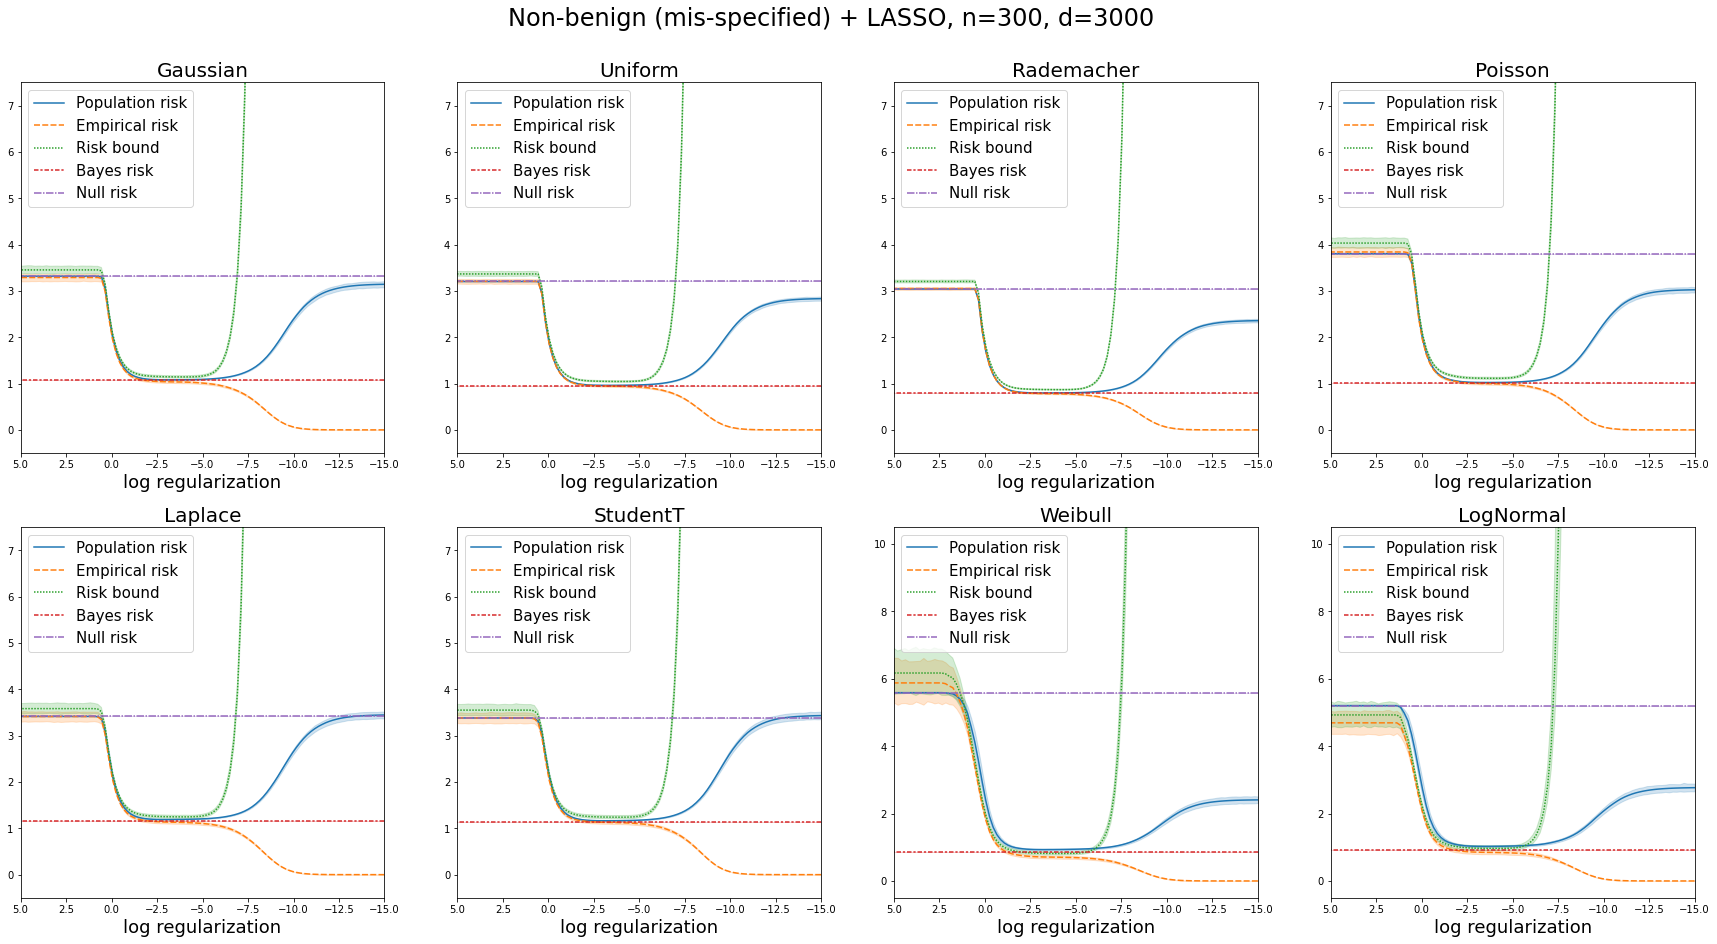

In [34]:
# make plot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))
fig.suptitle('Non-benign (mis-specified) + LASSO, ' + 'n=' + str(n) + ', d=' + str(d), 
             fontsize = 24, y = 0.95)

df['Risk bound'] *= 1.05
for i, dist in enumerate(ls_dist):
    sns.lineplot(data = df[df['Distribution'] == dist], ci = 95,
                 ax = axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(dist, fontsize = 20)
    axes[i // 4, i % 4].set_xlim((alphas[-1], alphas[0]))
    axes[i // 4, i % 4].set_xlabel('log regularization', fontsize = 18)
    if i <= 5:
        axes[i // 4, i % 4].set_ylim((-0.5, 7.5))
    else:
        axes[i // 4, i % 4].set_ylim((-0.5, 10.5))
    axes[i // 4, i % 4].legend(loc = 'upper left', fontsize = 15)

plt.show()

# Linear Classification

In [35]:
import classification
ls_dist = ['Gaussian', 'Uniform', 'Rademacher', 'Poisson',
           'Laplace', 'StudentT', 'Weibull', 'LogNormal']

## 1. $\ell_2$ margin

In [36]:
num_experiment = 50
num_alphas = 50

### 1.1. Isotropic features

In [37]:
n, d = 100, 120
w_star = np.zeros((d,1))
w_star[0] = 5
b_star = 3
alphas = np.linspace(-2.5, 15, num = num_alphas)

In [38]:
file_name = 'Isotropic_n=' + str(n) + '_d=' + str(d) + '_l2_margin.csv'

if os.path.exists(file_name):
    df = pd.read_csv(file_name).set_index('log regularization parameter')
    
else:
    df = pd.DataFrame()
    np.random.seed(0)
    
    tic = time.perf_counter()
    for dist in ls_dist:
        new_df = classification.isotropic_experiment(num_experiment, alphas, 
                                                     n, d, w_star, b_star, dist = dist, 
                                                     method = 'l2')
        df = pd.concat([df, new_df], axis = 0)
    toc = time.perf_counter()
    print(f'Experiment takes {toc - tic:0.4f} seconds!')

    df.to_csv(file_name)

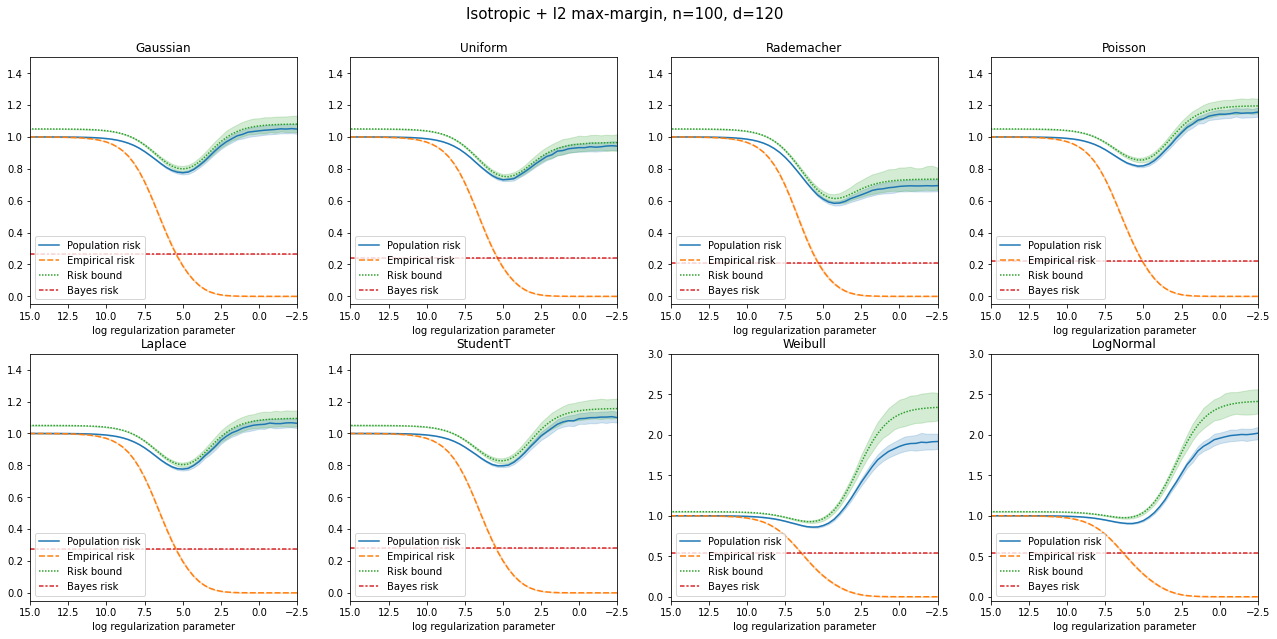

In [39]:
# make plot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(22, 10))
fig.suptitle('Isotropic + l2 max-margin, ' + 'n=' + str(n) + ', d=' + str(d), 
             fontsize = 15, y = 0.95)

df['Risk bound'] *= 1.05
for i, dist in enumerate(ls_dist):
    sns.lineplot(data = df[df['Distribution'] == dist], ci = 95,
                 ax = axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(dist)
    axes[i // 4, i % 4].set_xlim((alphas[-1], alphas[0]))
    if i <= 5:
        axes[i // 4, i % 4].set_ylim((-0.05, 1.5))
    else:
        axes[i // 4, i % 4].set_ylim((-0.05, 3))
    axes[i // 4, i % 4].legend(loc = 'lower left')

plt.show()

### 1.2. junk features

In [40]:
n, d = 100, 2000
sqrt_cov = np.array([1] + [0.05] * (d-1))
w_star = np.zeros((d,1))
w_star[0] = 5
b_star = 3
alphas = np.linspace(-6, 12, num = num_alphas)

In [41]:
file_name = 'Junk_feature_n=' + str(n) + '_d=' + str(d) + '_l2_margin.csv'

if os.path.exists(file_name):
    df = pd.read_csv(file_name).set_index('log regularization parameter')
    
else:
    df = pd.DataFrame()
    np.random.seed(0)
    
    tic = time.perf_counter()
    for dist in ls_dist:
        new_df = classification.experiment(num_experiment, alphas, 
                                           n, sqrt_cov, w_star, b_star, dist = dist, 
                                           method = 'l2', cov_split = 1)
        df = pd.concat([df, new_df], axis = 0)
    toc = time.perf_counter()
    print(f'Experiment takes {toc - tic:0.4f} seconds!')

    df.to_csv(file_name)

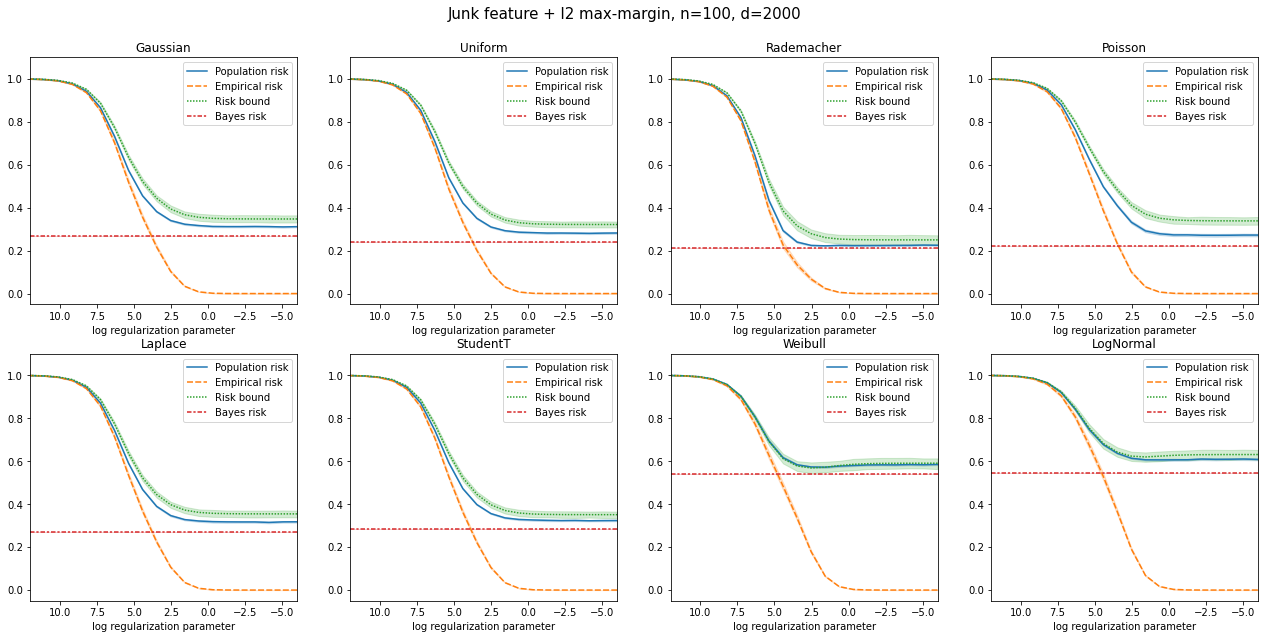

In [42]:
# make plot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(22, 10))
fig.suptitle('Junk feature + l2 max-margin, ' + 'n=' + str(n) + ', d=' + str(d), 
             fontsize = 15, y = 0.95)

for i, dist in enumerate(ls_dist):
    sns.lineplot(data = df[df['Distribution'] == dist], ci = 95,
                 ax = axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(dist)
    axes[i // 4, i % 4].set_xlim((alphas[-1], alphas[0]))
    axes[i // 4, i % 4].set_ylim((-0.05, 1.1))
    axes[i // 4, i % 4].legend(loc = 'upper right')

plt.show()

### 1.3. Non-benign features

In [43]:
n, d = 100, 2000
sqrt_cov = np.array([1/k for k in range(1, d+1)])
w_star = np.zeros((d,1))
w_star[0] = 5
b_star = 3
alphas = np.linspace(-10, 10, num = num_alphas)

In [44]:
file_name = 'Non_benign_n=' + str(n) + '_d=' + str(d) + '_l2_margin.csv'

if os.path.exists(file_name):
    df = pd.read_csv(file_name).set_index('log regularization parameter')
    
else:
    df = pd.DataFrame()
    np.random.seed(0)
    
    tic = time.perf_counter()
    for dist in ls_dist:
        new_df = classification.experiment(num_experiment, alphas, 
                                           n, sqrt_cov, w_star, b_star, dist = dist, 
                                           method = 'l2', cov_split = 1)
        df = pd.concat([df, new_df], axis = 0)
    toc = time.perf_counter()
    print(f'Experiment takes {toc - tic:0.4f} seconds!')

    df.to_csv(file_name)

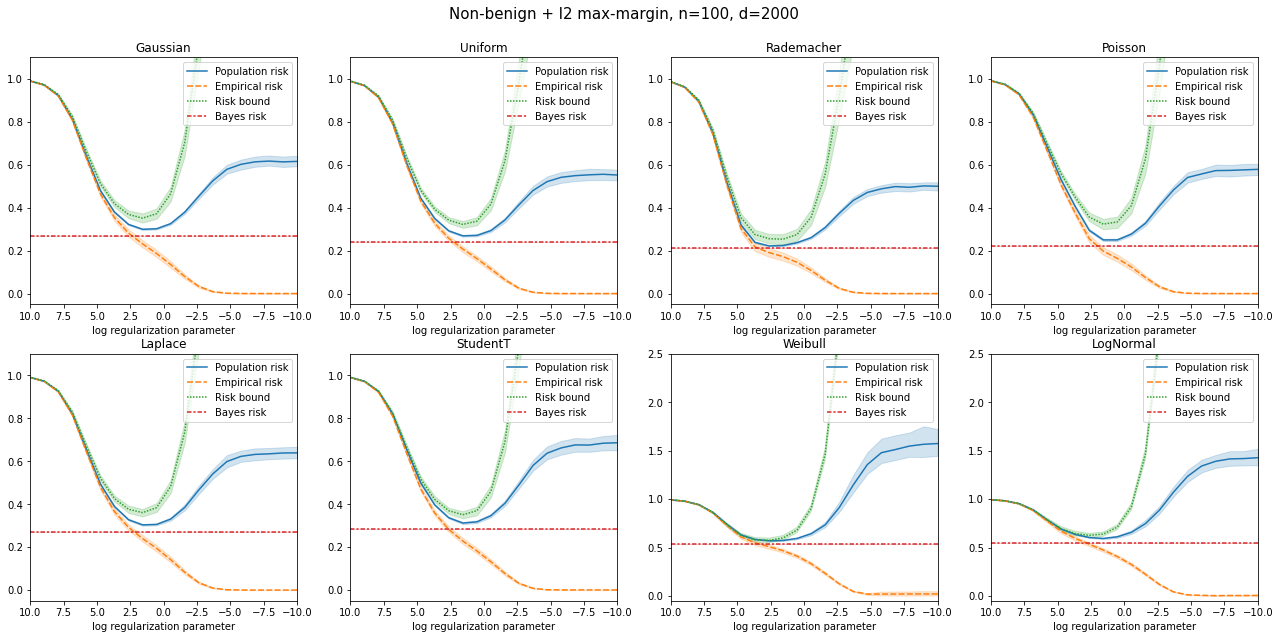

In [45]:
# make plot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(22, 10))
fig.suptitle('Non-benign + l2 max-margin, ' + 'n=' + str(n) + ', d=' + str(d), 
             fontsize = 15, y = 0.95)

for i, dist in enumerate(ls_dist):
    sns.lineplot(data = df[df['Distribution'] == dist], ci = 95,
                 ax = axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(dist)
    axes[i // 4, i % 4].set_xlim((alphas[-1], alphas[0]))
    if i <= 5:
        axes[i // 4, i % 4].set_ylim((-0.05, 1.1))
    else:
        axes[i // 4, i % 4].set_ylim((-0.05, 2.5))
    axes[i // 4, i % 4].legend(loc = 'upper right')

plt.show()

## 2. $\ell_1$ margin

In [46]:
num_experiment = 50
num_alphas = 50

### 2.1. Isotropic feature

In [47]:
n, d = 100, 120
w_star = np.zeros((d,1))
w_star[0] = 5
b_star = 3
alphas = np.linspace(-2.5, 15, num = num_alphas)

In [48]:
file_name = 'Isotropic_n=' + str(n) + '_d=' + str(d) + '_l1_margin.csv'

if os.path.exists(file_name):
    df = pd.read_csv(file_name).set_index('log regularization parameter')
    
else:
    df = pd.DataFrame()
    np.random.seed(0)
    
    tic = time.perf_counter()
    for dist in ls_dist:
        new_df = classification.isotropic_experiment(num_experiment, alphas, 
                                                     n, d, w_star, b_star, dist = dist, 
                                                     method = 'l1')
        df = pd.concat([df, new_df], axis = 0)
    toc = time.perf_counter()
    print(f'Experiment takes {toc - tic:0.4f} seconds!')

    df.to_csv(file_name)

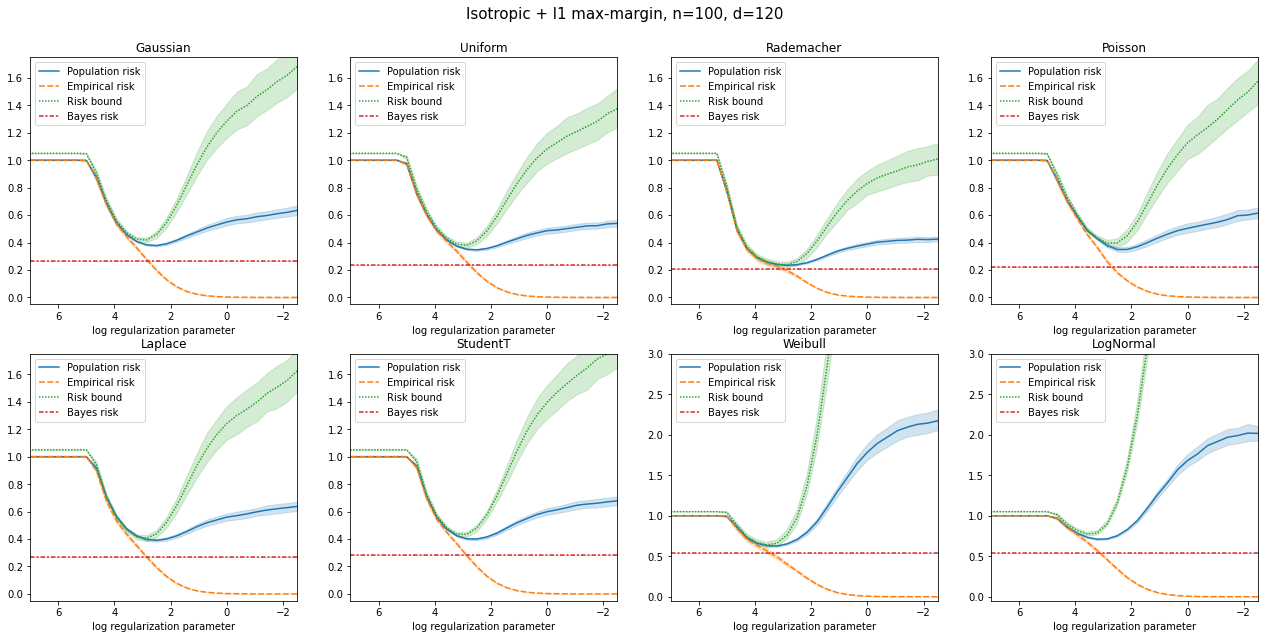

In [49]:
# make plot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(22, 10))
fig.suptitle('Isotropic + l1 max-margin, ' + 'n=' + str(n) + ', d=' + str(d), 
             fontsize = 15, y = 0.95)

df['Risk bound'] *= 1.05
for i, dist in enumerate(ls_dist):
    sns.lineplot(data = df[df['Distribution'] == dist], ci = 95,
                 ax = axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(dist)
    axes[i // 4, i % 4].set_xlim((7, alphas[0]))
    if i <= 5:
        axes[i // 4, i % 4].set_ylim((-0.05, 1.75))
    else:
        axes[i // 4, i % 4].set_ylim((-0.05, 3))
    axes[i // 4, i % 4].legend(loc = 'upper left')

plt.show()

### 2.2. junk features

In [50]:
n, d = 100, 2000
sqrt_cov = np.array([1] + [0.05] * (d-1))
w_star = np.zeros((d,1))
w_star[0] = 5
b_star = 3
alphas = np.linspace(-15, 7.5, num = num_alphas)

In [51]:
file_name = 'Junk_feature_n=' + str(n) + '_d=' + str(d) + '_l1_margin.csv'

if os.path.exists(file_name):
    df = pd.read_csv(file_name).set_index('log regularization parameter')
    
else:
    df = pd.DataFrame()
    np.random.seed(0)
    
    tic = time.perf_counter()
    for dist in ls_dist:
        new_df = classification.experiment(num_experiment, alphas, 
                                           n, sqrt_cov, w_star, b_star, dist = dist, 
                                           method = 'l1', cov_split = 1)
        df = pd.concat([df, new_df], axis = 0)
    toc = time.perf_counter()
    print(f'Experiment takes {toc - tic:0.4f} seconds!')

    df.to_csv(file_name)

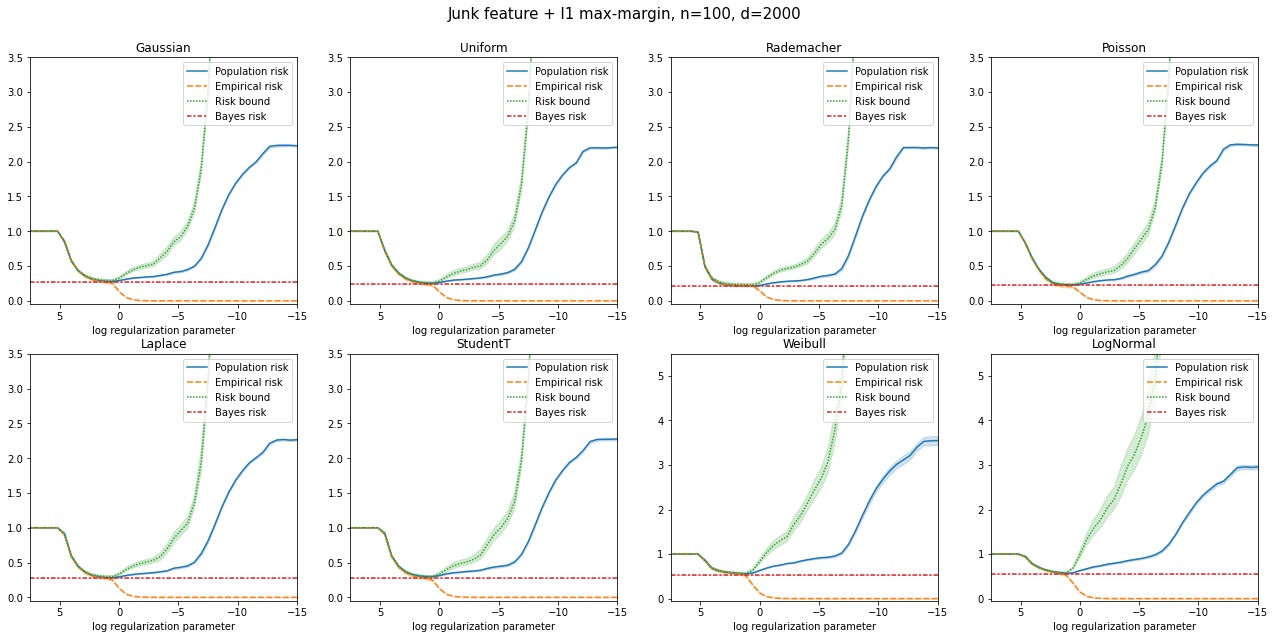

In [52]:
# make plot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(22, 10))
fig.suptitle('Junk feature + l1 max-margin, ' + 'n=' + str(n) + ', d=' + str(d), 
             fontsize = 15, y = 0.95)

for i, dist in enumerate(ls_dist):
    sns.lineplot(data = df[df['Distribution'] == dist], ci = 95,
                 ax = axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(dist)
    axes[i // 4, i % 4].set_xlim((alphas[-1], alphas[0]))
    if i <= 5:
        axes[i // 4, i % 4].set_ylim((-0.05, 3.5))
    else:
        axes[i // 4, i % 4].set_ylim((-0.05, 5.5))
    axes[i // 4, i % 4].legend(loc = 'upper right')

plt.show()

### 2.3. Non-benign features

In [53]:
n, d = 100, 2000
sqrt_cov = np.array([1/k for k in range(1, d+1)])
w_star = np.zeros((d,1))
w_star[0] = 5
b_star = 3
alphas = np.linspace(-15, 7.5, num = num_alphas)

In [54]:
file_name = 'Non_benign_n=' + str(n) + '_d=' + str(d) + '_l1_margin.csv'

if os.path.exists(file_name):
    df = pd.read_csv(file_name).set_index('log regularization parameter')
    
else:
    df = pd.DataFrame()
    np.random.seed(0)
    
    tic = time.perf_counter()
    for dist in ls_dist:
        new_df = classification.experiment(num_experiment, alphas, 
                                           n, sqrt_cov, w_star, b_star, dist = dist, 
                                           method = 'l1', cov_split = 1)
        df = pd.concat([df, new_df], axis = 0)
    toc = time.perf_counter()
    print(f'Experiment takes {toc - tic:0.4f} seconds!')

    df.to_csv(file_name)

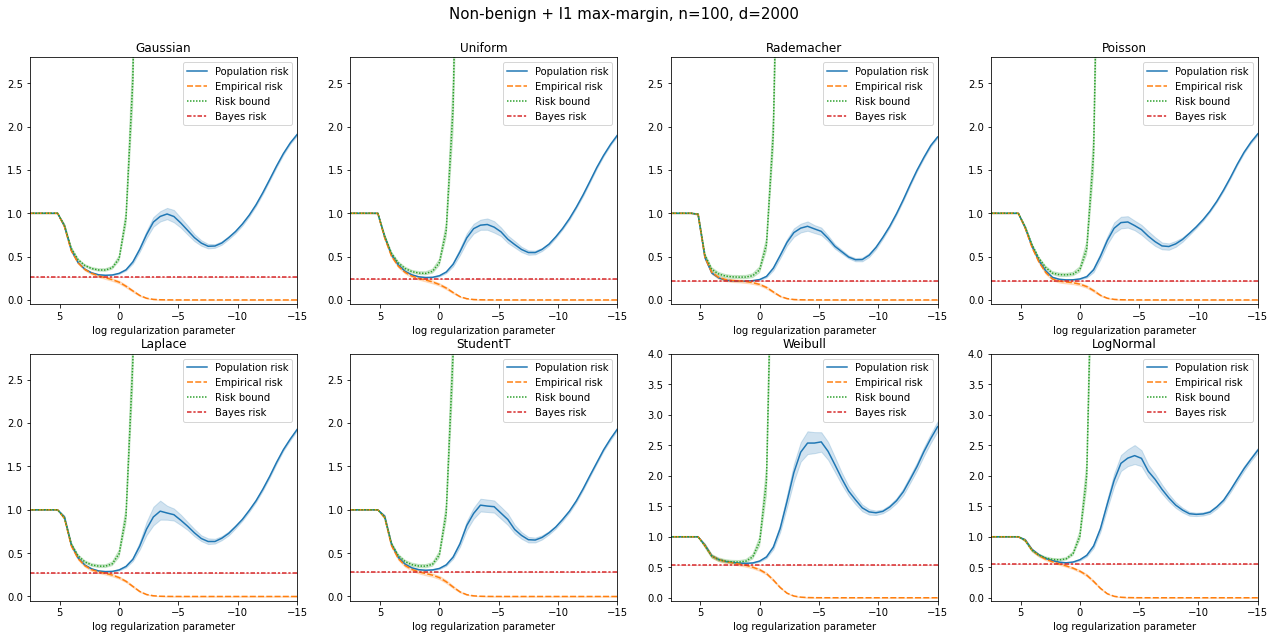

In [55]:
# make plot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(22, 10))
fig.suptitle('Non-benign + l1 max-margin, ' + 'n=' + str(n) + ', d=' + str(d), 
             fontsize = 15, y = 0.95)

for i, dist in enumerate(ls_dist):
    sns.lineplot(data = df[df['Distribution'] == dist], ci = 95,
                 ax = axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(dist)
    axes[i // 4, i % 4].set_xlim((alphas[-1], alphas[0]))
    if i <= 5:
        axes[i // 4, i % 4].set_ylim((-0.05, 2.8))
    else:
        axes[i // 4, i % 4].set_ylim((-0.05, 4))
    axes[i // 4, i % 4].legend(loc = 'upper right')

plt.show()